In [1]:
%load_ext autoreload
%matplotlib inline

# Some images generated for poster

In [2]:
import os, sys
import numpy as np
import pandas as pd
import sklearn.metrics
from IPython.display import display
sys.path.append(os.path.abspath(os.path.join('..')))

import plot.anomalies, plot.evaluation, plot.data, plot.features
from plot import pyplot as plt
from database.CERNMongoClient import CERNMongoClient
import pipeline.pipeline as pipeline
from anomaly_detection.factory import *
from evaluation import evaluation, segmentation
from feature_extraction import feature_extraction, preprocessing

db = CERNMongoClient()

# auto-load changes in imported modules
%autoreload 2

In [3]:
df = feature_extraction.load_features_from_file("features_b1_sw-30min*")

Loading file '/home/n/masters-thesis/src/../data-cern/features_b1_sw-30min*'.
File not found, loading '/home/n/masters-thesis/src/../data-cern/features_b1_sw-30min_2018-02-23.csv' instead.



In [4]:
# labels = db.query_elogbook_anomalies()
labels = db.query_elogbook_no_info(beam=1)

Fetching data for pattern MKI.ELOGBOOK_tagged from 2016-04-16 00:00:00 to 2016-09-14 00:00:00
Fetching data for MKI.ELOGBOOK_tagged



In [5]:
temps_up = df.filter(regex=".*B1:TEMP_TUBE_UP$")
display(len(temps_up), temps_up.head())

temps_down = df.filter(regex=".*B1:TEMP_TUBE_DOWN$")
display(len(temps_down), temps_down.head())

46090

MKI.D5L2.B1:TEMP_TUBE_UP  MKI.C5L2.B1:TEMP_TUBE_UP  \
2016-04-17 00:50:36                      23.8                      23.6   
2016-04-17 00:50:46                      23.8                      23.6   
2016-04-17 00:50:56                      23.8                      23.6   
2016-04-17 00:51:06                      23.8                      23.6   
2016-04-17 00:51:16                      23.8                      23.6   

                     MKI.B5L2.B1:TEMP_TUBE_UP  MKI.A5L2.B1:TEMP_TUBE_UP  
2016-04-17 00:50:36                      21.0                      21.0  
2016-04-17 00:50:46                      21.0                      21.0  
2016-04-17 00:50:56                      21.0                      21.0  
2016-04-17 00:51:06                      21.0                      21.0  
2016-04-17 00:51:16                      21.0                      21.0

46090

MKI.B5L2.B1:TEMP_TUBE_DOWN  MKI.A5L2.B1:TEMP_TUBE_DOWN  \
2016-04-17 00:50:36                        21.0                        22.1   
2016-04-17 00:50:46                        21.0                        22.1   
2016-04-17 00:50:56                        21.0                        22.1   
2016-04-17 00:51:06                        21.0                        22.1   
2016-04-17 00:51:16                        21.0                        22.1   

                     MKI.D5L2.B1:TEMP_TUBE_DOWN  MKI.C5L2.B1:TEMP_TUBE_DOWN  
2016-04-17 00:50:36                        24.3                        28.1  
2016-04-17 00:50:46                        24.3                        28.1  
2016-04-17 00:50:56                        24.3                        28.1  
2016-04-17 00:51:06                        24.3                        28.1  
2016-04-17 00:51:16                        24.3                        28.1

Plot anomaly dots on continuous data graph

In [6]:
ts_anomalies = []

for ts in labels.index.tolist():
    query_idx = np.where(ts <= temps_up.index)[0]
    
    if len(query_idx) > 0:
        ts_anomalies.append(temps_up.index[query_idx[0]])
    
display(len(ts_anomalies), ts_anomalies)

22

[Timestamp('2016-05-05 12:21:45'),
 Timestamp('2016-05-14 10:01:11'),
 Timestamp('2016-06-09 09:59:28'),
 Timestamp('2016-06-16 02:26:37'),
 Timestamp('2016-06-19 13:53:43'),
 Timestamp('2016-06-29 17:15:52'),
 Timestamp('2016-06-30 21:28:56'),
 Timestamp('2016-07-03 12:55:45'),
 Timestamp('2016-07-15 04:58:13'),
 Timestamp('2016-07-19 15:18:25'),
 Timestamp('2016-07-24 23:17:12'),
 Timestamp('2016-07-25 14:45:34'),
 Timestamp('2016-07-28 13:11:14'),
 Timestamp('2016-07-31 20:44:14'),
 Timestamp('2016-08-02 17:28:04'),
 Timestamp('2016-08-02 18:52:41'),
 Timestamp('2016-08-02 20:20:00'),
 Timestamp('2016-08-03 09:13:23'),
 Timestamp('2016-08-04 20:00:38'),
 Timestamp('2016-08-23 07:26:56'),
 Timestamp('2016-08-30 17:29:49'),
 Timestamp('2016-09-05 17:23:45')]

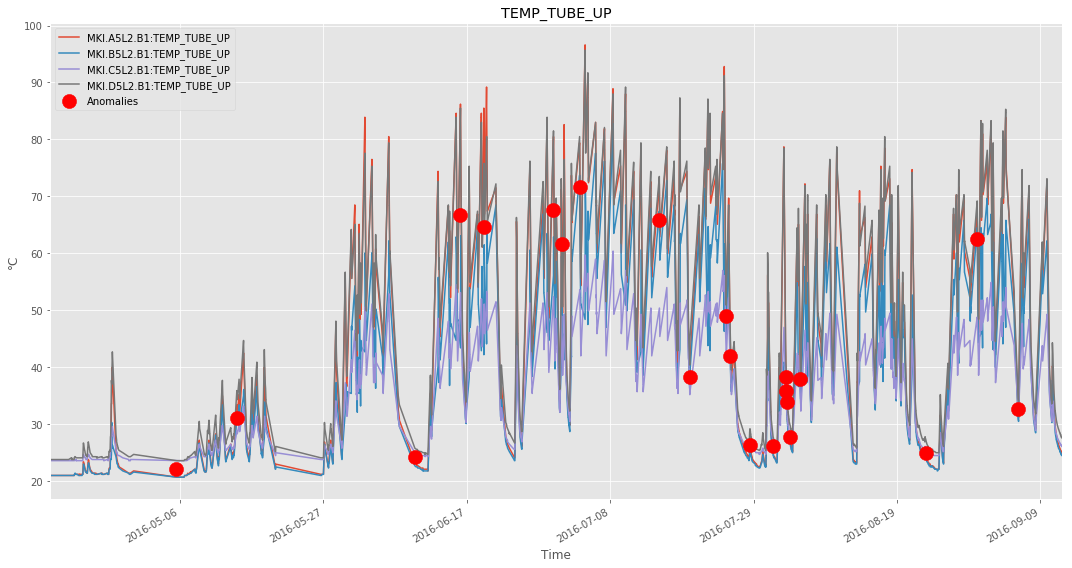

In [7]:
plot.data.continuous(temps_up, "TEMP_TUBE_UP", "°C", ts_anomalies=ts_anomalies)

Plot anomaly and predictions dots on continuous data graph

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None) 


| Trained detector and scored features: 3.2 seconds
| Created segments: 0.8 seconds
| Created results DataFrame: 1.0 seconds

IPOC SEGMENT STATS:
Number of segments:     640
Anomalous segments:     59
Predicted an. segments: 0
Min segment length:     0 days 00:00:00, 1 points
Mean segment length:    0 days 00:42:23, 72 points
Max segment length:     0 days 08:38:00, 3109 points

        y_true     y_pred label_id            timestamp
count    600.0  600.00000       19                  600
unique     2.0  600.00000       19                  600
top        0.0    0.07825  2179893  2016-04-23 16:29:58
freq     581.0    1.00000        1                    1 

| Results DataFrame check: 0.0 seconds



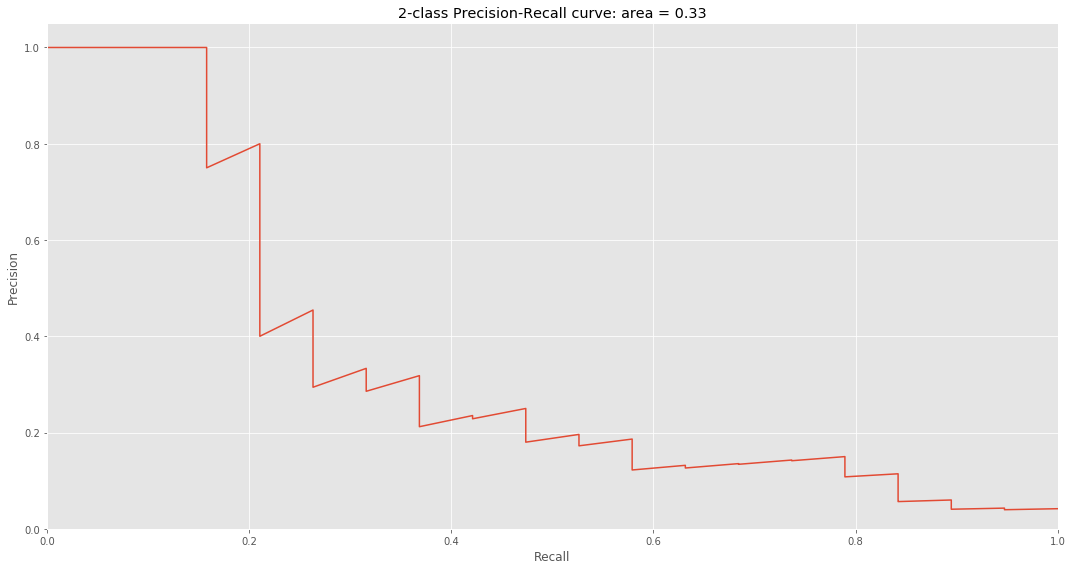

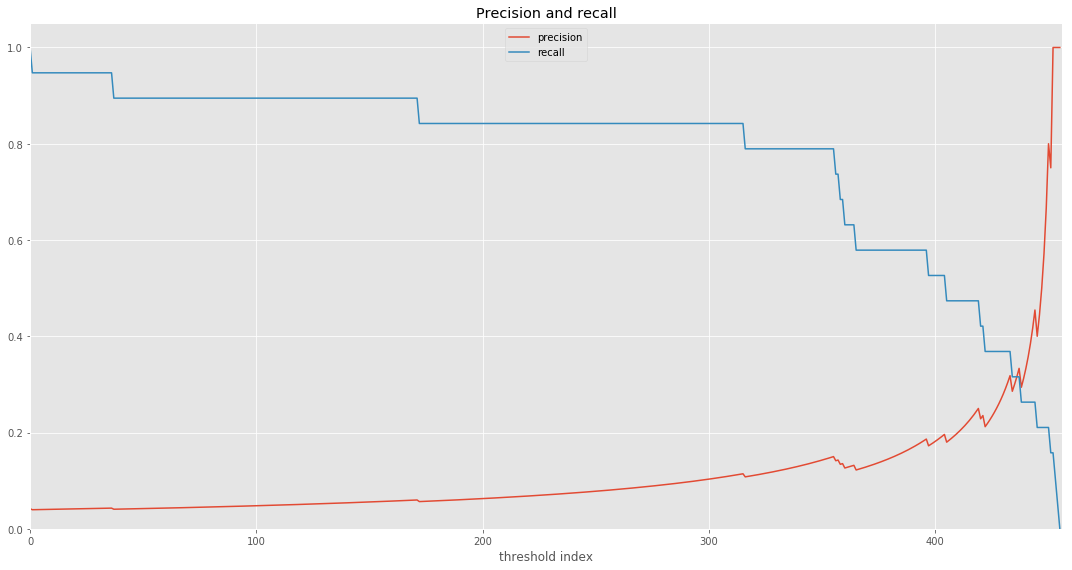

PR-curve tresholds: 455, min: 0.07, max: 1.00
Area under PR curve = 0.3330308726125814


| Evaluation: 0.3 seconds
| Pipeline execution time: 5.4 seconds



In [17]:
results, auc, precision, recall, thresholds = pipeline.pipeline(
    df, 
    labels,
    anomaly_detector="gmm",
    detector_parameters={"n_components": 2, "covariance_type": "full"},
    scale_data = True,
    verbose=True, 
    show_curve=True
)

In [19]:
n_anomalies = 30
ts_predictions = results.sort_values("y_pred", ascending=False)[:n_anomalies]["timestamp"].tolist()
display(len(ts_predictions), ts_predictions)

30

[Timestamp('2016-08-02 18:52:41'),
 Timestamp('2016-08-02 10:32:52'),
 Timestamp('2016-08-02 20:20:00'),
 Timestamp('2016-07-31 01:06:57'),
 Timestamp('2016-07-25 08:33:54'),
 Timestamp('2016-08-07 05:44:45'),
 Timestamp('2016-07-11 16:32:32'),
 Timestamp('2016-09-02 01:37:33'),
 Timestamp('2016-05-30 05:41:42'),
 Timestamp('2016-07-29 09:32:40'),
 Timestamp('2016-06-19 03:44:16'),
 Timestamp('2016-04-21 16:05:35'),
 Timestamp('2016-07-25 14:45:34'),
 Timestamp('2016-08-31 06:41:36'),
 Timestamp('2016-08-31 12:27:07'),
 Timestamp('2016-07-08 11:25:20'),
 Timestamp('2016-06-14 14:25:52'),
 Timestamp('2016-06-15 11:12:37'),
 Timestamp('2016-08-16 10:25:52'),
 Timestamp('2016-04-23 11:36:30'),
 Timestamp('2016-08-13 12:15:28'),
 Timestamp('2016-08-29 16:02:26'),
 Timestamp('2016-09-09 06:13:57'),
 Timestamp('2016-09-10 14:41:10'),
 Timestamp('2016-06-19 23:33:39'),
 Timestamp('2016-09-11 19:26:04'),
 Timestamp('2016-07-10 06:25:37'),
 Timestamp('2016-08-07 07:50:53'),
 Timestamp('2016-08-

In [20]:
temp_tube_mean = pd.DataFrame(
    temps_down.mean(axis=1), 
    columns=["B1 MEAN TEMP_TUBE_DOWN"]
)
temp_tube_mean.head()

B1 MEAN TEMP_TUBE_DOWN
2016-04-17 00:50:36                  23.875
2016-04-17 00:50:46                  23.875
2016-04-17 00:50:56                  23.875
2016-04-17 00:51:06                  23.875
2016-04-17 00:51:16                  23.875

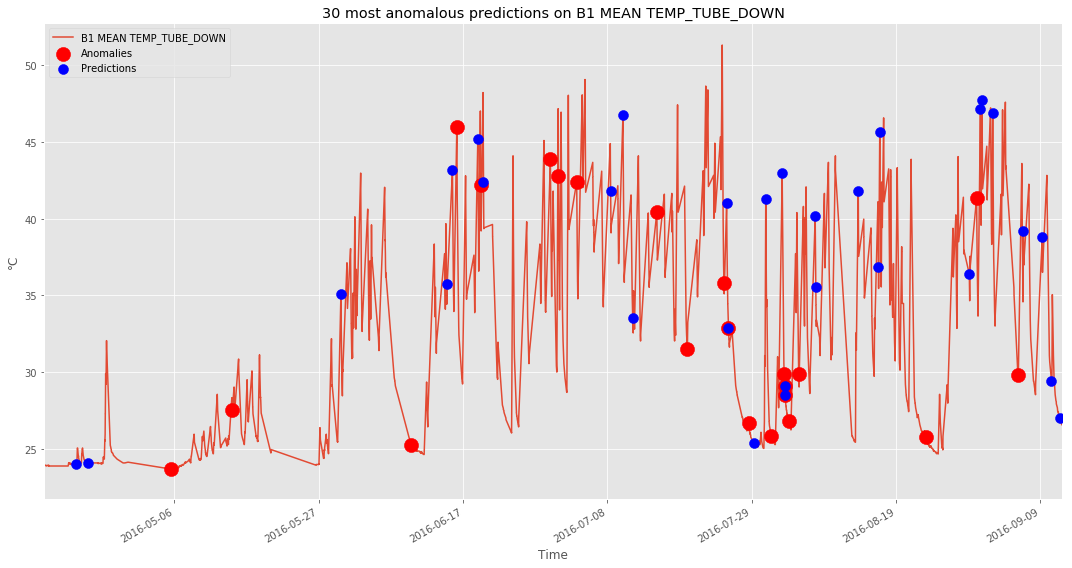

In [21]:
plot.data.continuous(temp_tube_mean, "30 most anomalous predictions on B1 MEAN TEMP_TUBE_DOWN", "°C", ts_anomalies=ts_anomalies, ts_predictions=ts_predictions)